<h4>Garage Temperature</h4>

I measured the temperature in the garage while it was heating up with the propane heater. End of December 2021.

In [17]:
using NLsolve

In [18]:
function f!(F, x)
    F[1]=x[1]+(x[2]-x[1])*exp(x[3]*8)-6.2
    F[2]=x[1]+(x[2]-x[1])*exp(x[3]*41)-13.7
    F[3]=x[1]+(x[2]-x[1])*exp(x[3]*70)-17.1
end

f! (generic function with 1 method)

In [19]:
function j!(J, x)
    J[1,1]=1-exp(8*x[3])
    J[1,2]=exp(8*x[3])
    J[1,3]=8*exp(8*x[3])*(x[2]-x[1])
    J[2,1]=1-exp(41*x[3])
    J[2,2]=exp(41*x[3])
    J[2,3]=41*exp(41*x[3])*(x[2]-x[1])
    J[3,1]=1-exp(70*x[3])
    J[3,2]=exp(70*x[3])
    J[3,3]=70*exp(70*x[3])*(x[2]-x[1])
end

j! (generic function with 1 method)

In [20]:
solution=nlsolve(f!,j!,[17;4;-0.01])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [17.0, 4.0, -0.01]
 * Zero: [21.102516200343025, 3.4450843542118483, -0.021203336415537885]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [22]:
T=solution.zero[1]

21.102516200343025

In [25]:
u0=solution.zero[2]

3.4450843542118483

In [26]:
k=solution.zero[3]

-0.021203336415537885

In [4]:
using DataFrames

In [5]:
using CSV

In [6]:
garage=DataFrame(CSV.File("./garage.csv"))

11×2 DataFrame
 Row │ time     temperature 
     │ Float64  Float64     
─────┼──────────────────────
   1 │     1.0          4.8
   2 │     8.0          6.2
   3 │    11.0          7.0
   4 │    23.0         10.2
   5 │    27.0         11.1
   6 │    36.0         12.8
   7 │    41.0         13.7
   8 │    45.0         14.3
   9 │    47.5         14.6
  10 │    56.5         15.6
  11 │    70.0         17.1

In [7]:
using Plots

In [15]:
x=range(0,stop=200,length=100)

0.0:2.0202020202020203:200.0

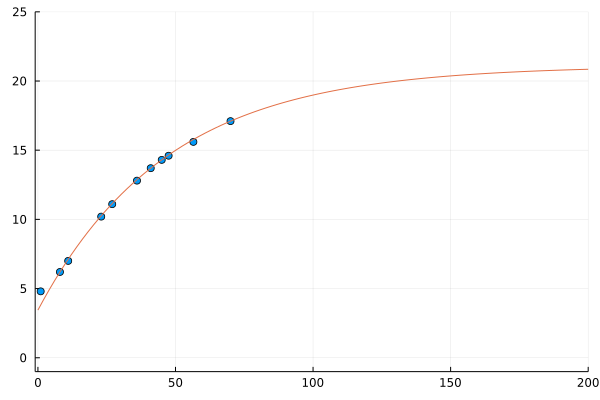

In [29]:
plot(garage.time,garage.temperature,seriestype=:scatter,lw=3,legend=false,ylims=(-1,25),xlims=(-1,200))
plot!(x,T.+(u0.-T).*exp.(k.*x))